In [1]:
import tensorflow as tf

### set data

In [3]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [4]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


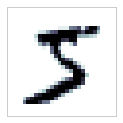

In [5]:
%matplotlib inline
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [7]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

----

### dense layer == FCN (Fully Connected Network)

CNN (컨볼루셔널, dense x)

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense # dense 레이어 , FCN 
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()

첫 레이어는 인풋 필요

activation = 'sigmoid'  -> 0 과 1 사이 실수값
- OvR용으로 사용하겠다는 의미

In [10]:
model.add(Dense(15, input_dim=784, activation="sigmoid"))

In [11]:
model.add(Dense(10, activation="sigmoid"))

lr = learning rate

loss = 손실함수

metrics

In [12]:
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

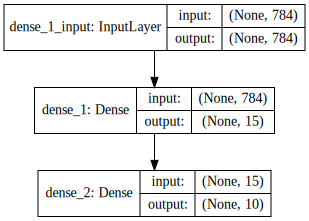

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

trainable params : flag를 걸어서 업데이트 안하는 변수를 정해줄 수 있음

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [15]:
l1 = model.layers[0] # 각각의 레이어 오브젝트
l2 = model.layers[1]

In [16]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1', keras.layers.core.Dense, (None, 15), 'sigmoid', 11775)

In [17]:
l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_2', keras.layers.core.Dense, (None, 10), 'sigmoid', 160)

In [18]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), # 에포크 끝날때 마다 cv
                 verbose=2) # progress 체크

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.1019 - acc: 0.2442 - val_loss: 0.0864 - val_acc: 0.3214
Epoch 2/30
 - 2s - loss: 0.0845 - acc: 0.3922 - val_loss: 0.0821 - val_acc: 0.4407
Epoch 3/30
 - 2s - loss: 0.0796 - acc: 0.4996 - val_loss: 0.0765 - val_acc: 0.5341
Epoch 4/30
 - 2s - loss: 0.0740 - acc: 0.5619 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/30
 - 2s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6523
Epoch 6/30
 - 2s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/30
 - 2s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7316
Epoch 8/30
 - 2s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 2s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7638
Epoch 10/30
 - 2s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 2s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7894
Epoch 12/30
 - 2s - loss: 0.0435 - 

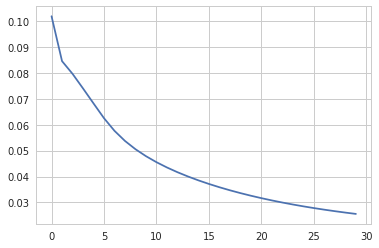

In [19]:
plt.plot(hist.history['loss'])
plt.show()

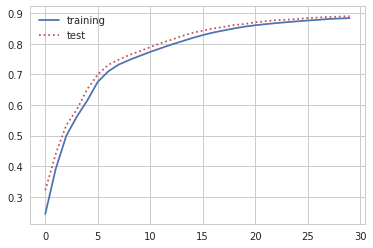

In [20]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [21]:
hist.history['val_acc'][-1:]

[0.8904000008106232]

In [22]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

---

In [23]:
model2 = Sequential()
model2.add(Dense(5, input_dim=784, activation="sigmoid"))
model2.add(Dense(10, activation="sigmoid"))
model2.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [24]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [25]:
%%time
hist2 = model2.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.1180 - acc: 0.0991 - val_loss: 0.0913 - val_acc: 0.0993
Epoch 2/30
 - 2s - loss: 0.0902 - acc: 0.1605 - val_loss: 0.0896 - val_acc: 0.2062
Epoch 3/30
 - 2s - loss: 0.0893 - acc: 0.2187 - val_loss: 0.0890 - val_acc: 0.2392
Epoch 4/30
 - 2s - loss: 0.0889 - acc: 0.2345 - val_loss: 0.0886 - val_acc: 0.2333
Epoch 5/30
 - 2s - loss: 0.0884 - acc: 0.2365 - val_loss: 0.0882 - val_acc: 0.2342
Epoch 6/30
 - 2s - loss: 0.0878 - acc: 0.2489 - val_loss: 0.0874 - val_acc: 0.2542
Epoch 7/30
 - 2s - loss: 0.0869 - acc: 0.2852 - val_loss: 0.0864 - val_acc: 0.3089
Epoch 8/30
 - 2s - loss: 0.0857 - acc: 0.3274 - val_loss: 0.0849 - val_acc: 0.3467
Epoch 9/30
 - 2s - loss: 0.0840 - acc: 0.3647 - val_loss: 0.0831 - val_acc: 0.3891
Epoch 10/30
 - 2s - loss: 0.0823 - acc: 0.4056 - val_loss: 0.0814 - val_acc: 0.4199
Epoch 11/30
 - 2s - loss: 0.0807 - acc: 0.4260 - val_loss: 0.0798 - val_acc: 0.4346
Epoch 12/30
 - 2s - loss: 0.0791 - 

In [26]:
hist.history['val_acc'][-1:]

[0.8904000008106232]

In [27]:
hist2.history['val_acc'][-1:]

[0.6756000006198883]